In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from nltk.tokenize import word_tokenize
import statsmodels.api as sm
from statsmodels.formula.api import ols

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

In [2]:
def regression_graph(y,x,df,title):

    # Set the aesthetic style of the plots
    sns.set(style="whitegrid")

    # Create a regression plot
    plt.figure(figsize=(10, 6))
    sns.regplot(y=y, x=x, data=df, fit_reg=True, 
                scatter_kws={'s': 50, 'alpha': 0.6, 'color': 'b'}, 
                line_kws={'color': 'red', 'linewidth': 2})

    # Customize the plot with titles and labels
    plt.title(title, fontsize=20)

    # Customize the ticks on the axes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Show grid
    plt.grid(True, linestyle='--', alpha=0.7)

    # Show the plot
    plt.show()

In [3]:
df_model = pd.read_csv('../data/model_data.csv')[['Country',
        'population', 'income', 'democracy',
       'health_expenditure', 'coal_rents', 'temperature_change',
       'air_pollution', 'eu']]
df_ndc = pd.read_csv('../data/ndc_files.csv')

# Exploratory data analysis

In your paper please describe the data set used in this analysis. Le the reader know how many data points there are, how many rows and columns and what do the columns mean? What are the descriptive statistics of the columns.

In [4]:
df_ndc.shape

(158, 3)

In [5]:
df_model.columns

Index(['Country', 'population', 'income', 'democracy', 'health_expenditure',
       'coal_rents', 'temperature_change', 'air_pollution', 'eu'],
      dtype='object')

In [6]:
df_model.head()

,Country,population,income,democracy,health_expenditure,coal_rents,temperature_change,air_pollution,eu
0,AFG,17.381746,6.304866,3.083333,10.961983,0.233553,0.854639,53.200001,Non-EU
1,ALB,14.871946,8.324605,8.083333,5.900000,0.000387,0.803765,17.900000,Non-EU
2,AND,11.255410,10.524712,10.000000,10.324107,0.000000,0.000000,9.900000,Non-EU
3,ARE,16.052061,10.549067,1.333333,3.403416,0.000000,0.927765,39.400002,Non-EU
4,ARG,17.590347,9.456438,8.916666,7.544399,0.000074,1.304636,11.800000,Non-EU


In [7]:
df_model[['eu']].value_counts()

eu    
Non-EU    147
EU         28
Name: count, dtype: int64

In [13]:
print(df_model.describe().to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
 & population & income & democracy & health_expenditure & coal_rents & temperature_change & air_pollution \\
\midrule
count & 175.000000 & 175.000000 & 175.000000 & 175.000000 & 175.000000 & 175.000000 & 175.000000 \\
mean & 15.540564 & 8.598532 & 6.973173 & 6.827503 & 0.089427 & 0.771336 & 24.278857 \\
std & 2.185184 & 1.476368 & 2.940383 & 2.833060 & 0.401605 & 0.398239 & 16.490205 \\
min & 9.325899 & 4.205596 & 0.000000 & 1.749096 & 0.000000 & -0.219555 & 5.700000 \\
25% & 14.440855 & 7.580041 & 5.208333 & 4.907672 & 0.000000 & 0.505085 & 12.800000 \\
50% & 15.831739 & 8.570339 & 7.833333 & 6.503357 & 0.000000 & 0.730487 & 19.400000 \\
75% & 17.015821 & 9.666315 & 9.583334 & 8.289056 & 0.010683 & 1.031188 & 30.850000 \\
max & 21.044382 & 12.043058 & 10.000000 & 17.862183 & 4.361818 & 1.750698 & 94.300003 \\
\bottomrule
\end{tabular}



In [8]:
df_ndc

,doc_id,text,Country
0,AFG,ISLAMIC REPUBLIC OF AFGHANISTAN Intended Natio...,AFG
1,ALB,Intended Nationally Determined Contribution (I...,ALB
2,AND,Planned contributions determined at national l...,AND
3,ARE,SUBMISSION BY THE UNITED ARAB EMIRATES\n22 Oct...,ARE
4,ARG,1. Background\nRepublic of Argentina\nFirst Re...,ARG
...,...,...,...
153,VUT,REPUBLIC OF VANUATU\nThe main mitigation cont...,VUT
154,WSM,Samoa’s Intended Nationally Determined Cont...,WSM
155,ZAF,South Africa's Intended Nationally Determined ...,ZAF
156,ZMB,ZAMBIA'S INTENDED NATIONALLY DETERMIN...,ZMB


# Distribution of parameters.
Please make historgram of all the different prameters of the dataset. Describe what this means in your paper and add the graphs that are relevant for your analysis to your paper.

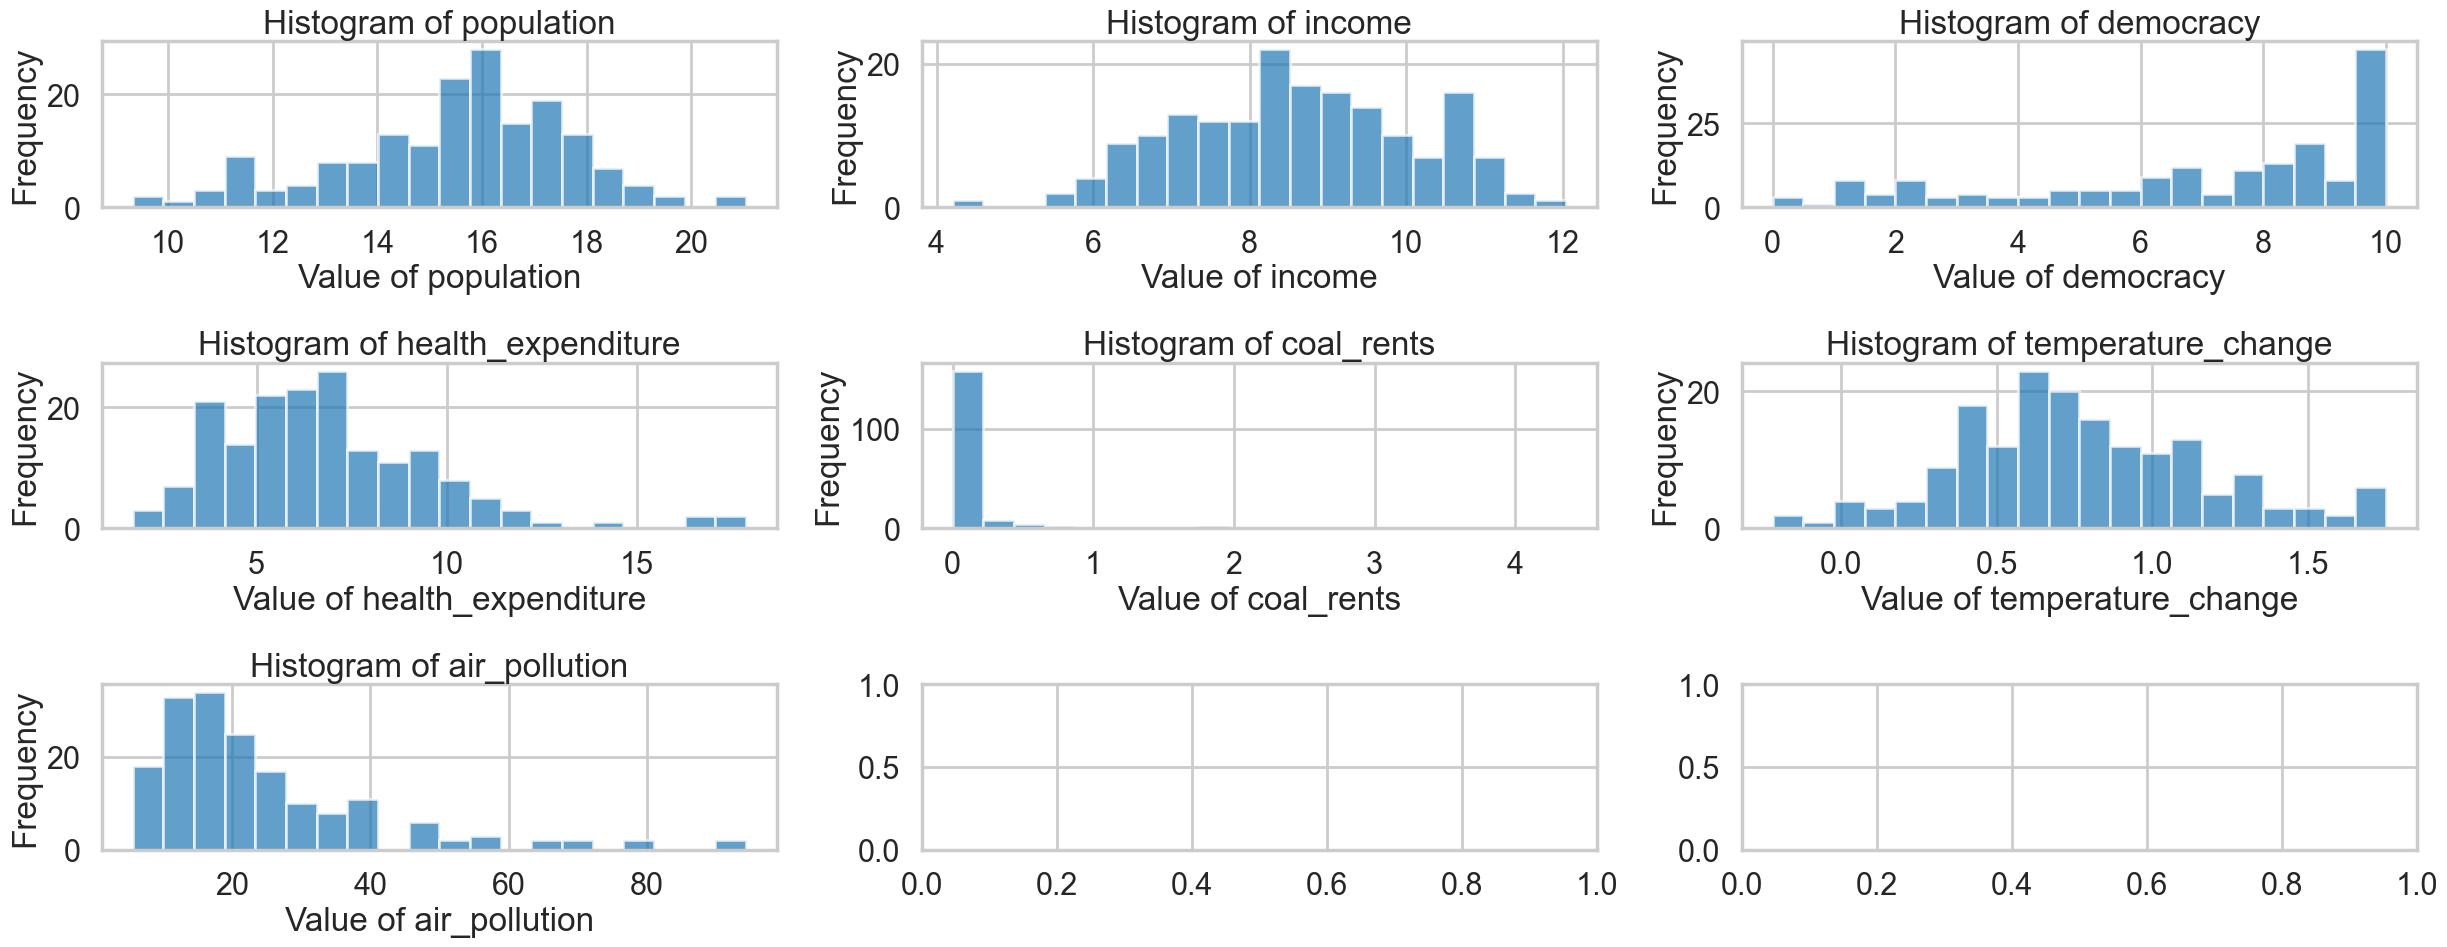

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 10), squeeze=False)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot histograms and set titles and labels
for i, col in enumerate(df_model[['population', 'income', 'democracy', 'health_expenditure',
       'coal_rents', 'temperature_change', 'air_pollution']].columns):
    df_model[col].plot.hist(ax=axes[i], alpha=0.7, bins=20)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(f'Value of {col}')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [10]:
df_model.columns

Index(['Country', 'health_count', 'total_sentences', 'total_words',
       'health_percent', 'population', 'sids', 'income', 'democracy',
       'health_expenditure', 'coal_rents', 'temperature_change',
       'air_pollution', 'HES', 'HES_1', 'HES_2', 'HES_3', 'HES_4',
       'health_topic', 'economy_topic', 'energy_topic', 'agri_topic',
       'Other_1', 'Other_2', 'eu'],
      dtype='object')

# Correlation matrix

Use the pandas .corr method to look at potential correlations between variables. Answer the following questions:

1) What variables are heavily correlated?
2) Why do you think they are correlated?

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

In [31]:
print(df_model.corr(numeric_only=True).to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
 & population & income & democracy & health_expenditure & coal_rents & temperature_change & air_pollution \\
\midrule
population & 1.000000 & -0.183815 & -0.285559 & -0.091475 & 0.134648 & 0.268372 & 0.290775 \\
income & -0.183815 & 1.000000 & 0.424512 & 0.245102 & -0.071623 & -0.115205 & -0.371265 \\
democracy & -0.285559 & 0.424512 & 1.000000 & 0.367748 & 0.045630 & -0.163917 & -0.586278 \\
health_expenditure & -0.091475 & 0.245102 & 0.367748 & 1.000000 & -0.075621 & -0.041536 & -0.399306 \\
coal_rents & 0.134648 & -0.071623 & 0.045630 & -0.075621 & 1.000000 & 0.184409 & 0.063178 \\
temperature_change & 0.268372 & -0.115205 & -0.163917 & -0.041536 & 0.184409 & 1.000000 & 0.071392 \\
air_pollution & 0.290775 & -0.371265 & -0.586278 & -0.399306 & 0.063178 & 0.071392 & 1.000000 \\
\bottomrule
\end{tabular}



# Potential Relationships to Investigate

Please run some analysis to inform answering your research question. Below are some suggestions and examples to show potential models and graphs. Choose 3 graphs that show a meaningful relationship and add them to your paper with a description and analysis.

Dependent Variable - income

Distributions-
Income
Population
Democracy
Climate Change

Explore Data:
Income in EU Countries vs Non-EU countries
Income ~ Health Count
Income ~ health_expenditure
Income ~ temperature_change
Income ~ air_pollution

NLP Analysis:
health_count vs income
Health_count vs income + total words


In [34]:
#example code
m = ols('income ~ air_pollution',df_model).fit()
m.summary()

/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     27.66
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           4.23e-07
Time:                        08:41:47   Log-Likelihood:                -303.01
No. Observations:                 175   AIC:                             610.0
Df Residuals:                     173   BIC:                             616.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         9.4055      0.185     50.750      0.000       9.040       9.771
air_pollution    -0.0332      0.006     -5.259      0.000      -0.046      -0.021
==============================================================================
Omnibus:                        1.500   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.472   Jarque-Bera (JB):                1.156
Skew:                           0.051   Prob(JB):                        0.561
Kurtosis:                       3.385   Cond. No.                         52.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
print(m.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &      income      & \textbf{  R-squared:         } &     0.138   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.133   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     27.66   \\
\textbf{Date:}             & Fri, 05 Jul 2024 & \textbf{  Prob (F-statistic):} &  4.23e-07   \\
\textbf{Time:}             &     08:43:12     & \textbf{  Log-Likelihood:    } &   -303.01   \\
\textbf{No. Observations:} &         175      & \textbf{  AIC:               } &     610.0   \\
\textbf{Df Residuals:}     &         173      & \textbf{  BIC:               } &     616.4   \\
\textbf{Df Model:}         &           1      & \textbf{                     } &             \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                        & \textbf{coef}

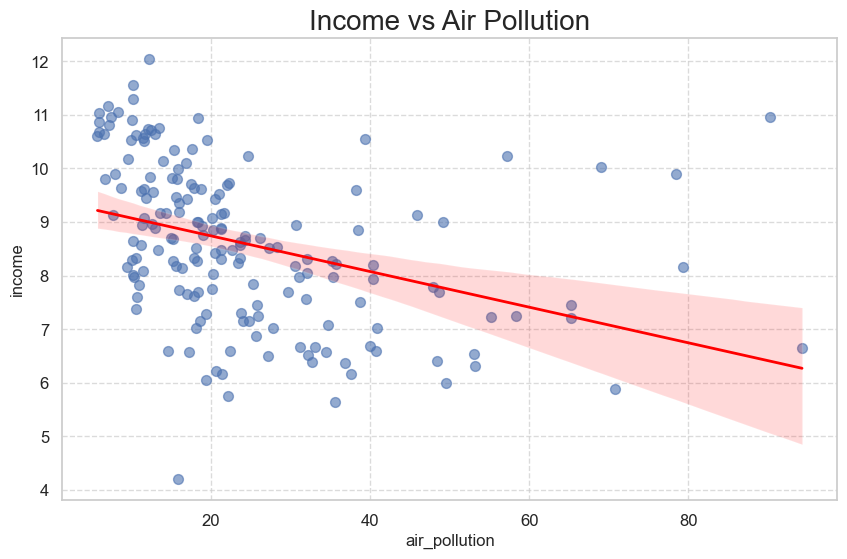

In [30]:
regression_graph('income','air_pollution',df_model,'Income vs Air Pollution')

# Logistic Regression for Categorization



In [50]:
df_model.columns

Index(['Country', 'population', 'income', 'democracy', 'health_expenditure',
       'coal_rents', 'temperature_change', 'air_pollution', 'eu'],
      dtype='object')

In [51]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)

allvars = df_model[['population', 'income','air_pollution']]
design = MS(allvars)
X = design.fit_transform(allvars).astype(float)
y = df_model.eu == 'EU'
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-13.4285,3.625,-3.705,0.000
population,0.2423,0.123,1.972,0.049
income,1.0149,0.272,3.728,0.000
air_pollution,-0.0804,0.040,-1.993,0.046


# Document Term Matrix

In [29]:
pd.read_csv('../data/model_data.csv')

,Country,health_count,total_sentences,total_words,health_percent,population,sids,income,democracy,health_expenditure,...,HES_2,HES_3,HES_4,health_topic,economy_topic,energy_topic,agri_topic,Other_1,Other_2,eu
0,AFG,3,122,3964,0.075681,17.381746,0,6.304866,3.083333,10.961983,...,1,0,0,0.193022,0.179496,0.188787,0.206940,0.119446,0.112311,Non-EU
1,ALB,0,32,1246,0.000000,14.871946,0,8.324605,8.083333,5.900000,...,0,0,0,0.035291,0.148707,0.553311,0.026290,0.159433,0.076969,Non-EU
2,AND,2,77,2766,0.072307,11.255410,0,10.524712,10.000000,10.324107,...,0,0,0,0.048727,0.082852,0.415458,0.039969,0.172799,0.240195,Non-EU
3,ARE,1,75,2437,0.041034,16.052061,0,10.549067,1.333333,3.403416,...,0,0,0,0.209761,0.162986,0.336477,0.116617,0.083639,0.090520,Non-EU
4,ARG,6,130,4878,0.123001,17.590347,0,9.456438,8.916666,7.544399,...,1,0,0,0.098628,0.120778,0.180449,0.078079,0.273736,0.248329,Non-EU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,VUT,5,110,3803,0.131475,12.536563,1,7.968961,8.595741,3.696152,...,1,0,0,0.275576,0.237901,0.168402,0.113791,0.102470,0.101859,Non-EU
171,WSM,1,101,2663,0.037552,12.178368,1,8.320975,8.595741,5.532094,...,0,0,0,0.169541,0.192727,0.352196,0.065833,0.134242,0.085461,Non-EU
172,ZAF,2,185,5997,0.033350,17.844492,0,8.570339,8.916666,8.095828,...,0,0,0,0.176302,0.194717,0.303262,0.069633,0.111074,0.145011,Non-EU
173,ZMB,24,155,4830,0.496894,16.610563,0,7.155067,6.500000,4.477207,...,1,1,1,0.239534,0.166162,0.198090,0.227636,0.090191,0.078386,Non-EU


In [32]:
df_ndc.text[0]

'ISLAMIC REPUBLIC OF AFGHANISTAN Intended Nationally Determined Contribution\nSubmission to the United Nations Framework Convention on Climate Change\n21 September 2015\n*****\nThe Islamic Republic of Afghanistan hereby communicates its Intended Nationally Determined Contribution (INDC) and information to facilitate understanding of the contribution.\n Base Year:\nTarget Years: Contribution Type: Sectors:\nGases Covered: Target:\nFinancial Needs:\n2005\n2020 to 2030\nConditional\nExecutive Summary\n        Energy, natural resource management, agriculture, waste management and mining\nCarbon dioxide (CO2), methane (CH4), and nitrous oxide (N2O)\nThere will be a 13.6% reduction in GHG emissions by 2030 compared to a business as usual (BAU) 2030 scenario, conditional on external support.\nTotal: USD 17.405 billion\n\uf0b7 Adaptation: USD 10.785 billion\n\uf0b7 Mitigation: USD 6.62 billion (2020-2030)\n          Figure 1 Figure 1. Greenhouse Gas Emissions for Afghanistan showing 13.6% rela

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Sample documents
documents = [
    "this is a sample document",
    "this document is another example example example",
    "and here is a different one"
]

# Create a document-term matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print("Original DTM:")
print(df)


Original DTM:
   and  another  different  document  example  here  is  one  sample  this
0    0        0          0         1        0     0   1    0       1     1
1    0        1          0         1        3     0   1    0       0     1
2    1        0          1         0        0     1   1    1       0     0


In [ ]:
# Desired words
selected_words = ['this', 'example', 'different']

# Total word counts in each document
total_word_counts = df.sum(axis=1)

# Word counts for the selected words
selected_word_counts = df[selected_words].sum(axis=1)

# Proportion of selected words
proportion_selected_words = selected_word_counts / total_word_counts

# Combine the results in a DataFrame
result_df = pd.DataFrame({
    'total_word_counts': total_word_counts,
    'selected_word_counts': selected_word_counts,
    'proportion_selected_words': proportion_selected_words
})

print("Proportion of selected words:")
print(result_df)


# Custering with T-NES


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df_model.head()

,Country,population,income,democracy,health_expenditure,coal_rents,temperature_change,air_pollution,eu
0,AFG,17.381746,6.304866,3.083333,10.961983,0.233553,0.854639,53.200001,Non-EU
1,ALB,14.871946,8.324605,8.083333,5.900000,0.000387,0.803765,17.900000,Non-EU
2,AND,11.255410,10.524712,10.000000,10.324107,0.000000,0.000000,9.900000,Non-EU
3,ARE,16.052061,10.549067,1.333333,3.403416,0.000000,0.927765,39.400002,Non-EU
4,ARG,17.590347,9.456438,8.916666,7.544399,0.000074,1.304636,11.800000,Non-EU


In [11]:
df_model.columns
features = ['population', 'income', 'democracy', 'health_expenditure',
       'coal_rents', 'temperature_change', 'air_pollution']

In [12]:
X = df_model[features].dropna()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_scaled.min()

/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

-2.9840402384588205

In [14]:
X_scaled[0]

array([ 0.84499304, -1.55804534, -1.32669859,  1.46355672,  0.35990563,
        0.2097793 ,  1.75887026])

/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

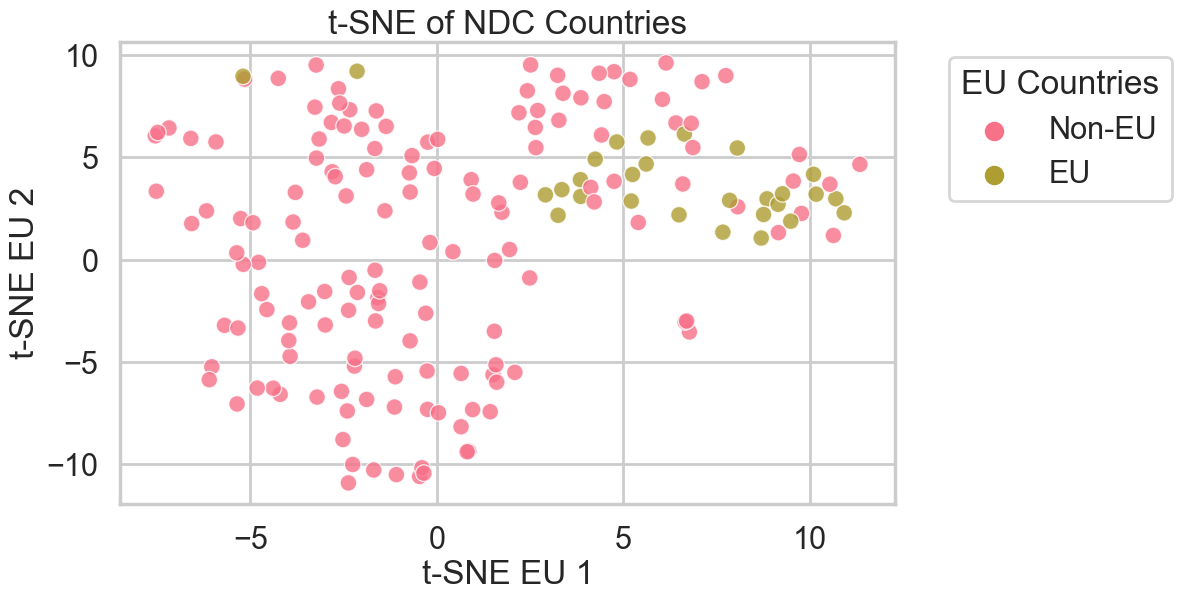

In [22]:
# Convert categorical variable 'decision' to numerical
le = LabelEncoder()
df_model['eu_num'] = le.fit_transform(df_model['eu'])
df_model = df_model.dropna()

# Features to be used in t-SNE
features = ['population', 'income', 'democracy', 'health_expenditure',
       'coal_rents', 'temperature_change', 'air_pollution']
X = df_model[features].dropna()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Add t-SNE results to the DataFrame
df_model['tsne-2d-one'] = X_tsne[:, 0]
df_model['tsne-2d-two'] = X_tsne[:, 1]

# Define a custom color palette with 5 colors
custom_palette = sns.color_palette('husl', 5)

# Plot t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='tsne-2d-one', y='tsne-2d-two',
    hue='eu',
    palette=custom_palette,
    data=df_model,
    alpha=0.8
)
plt.title('t-SNE of NDC Countries')
plt.xlabel('t-SNE EU 1')
plt.ylabel('t-SNE EU 2')
plt.legend(title='EU Countries', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/var/folders/v9/8whxr3fd1mv_pwkjh0kn920m0000gn/T/ipykernel_73909/3032854677.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/matplotlib/collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


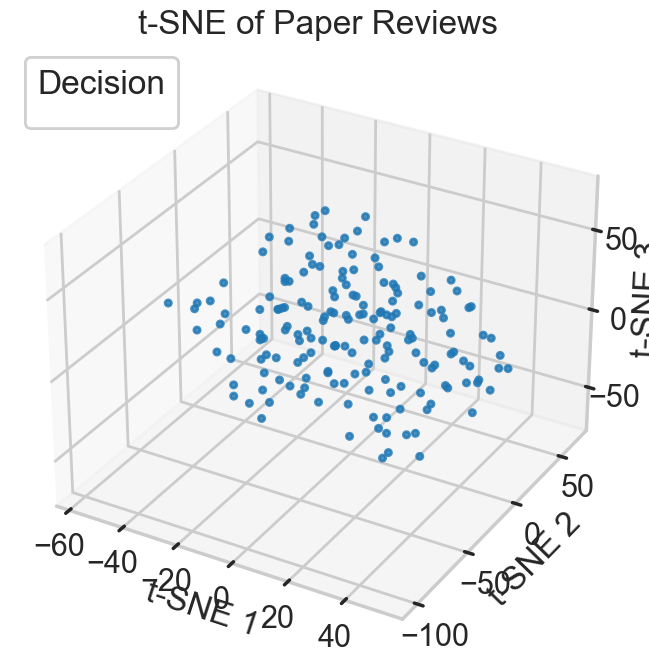

In [28]:
# Apply t-SNE
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Add t-SNE results to the DataFrame
df_model['tsne-3d-one'] = X_tsne[:, 0]
df_model['tsne-3d-two'] = X_tsne[:, 1]
df_model['tsne-3d-three'] = X_tsne[:, 2]

# Define a custom color palette with 5 colors
custom_palette = sns.color_palette('husl', 5)

# Plot t-SNE results in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    xs=df_model['tsne-3d-one'],
    ys=df_model['tsne-3d-two'],
    zs=df_model['tsne-3d-three'],
    #c=df_model['eu_num'],
    cmap=custom_palette,
    alpha=0.8
)

# Legend
legend_labels = le.classes_
legend = ax.legend(handles=scatter.legend_elements()[0], title='Decision', labels=legend_labels, loc='upper left')
ax.add_artist(legend)

# Axes labels and title
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_zlabel('t-SNE 3')
ax.set_title('t-SNE of Paper Reviews')

plt.show()